<a href="https://colab.research.google.com/github/ahana2611/Self-study-Projects/blob/main/KNN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider an appropriate time-series dataset and forecast using moving average model

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#load the iris dataset
iris = load_iris(as_frame = True)

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [48]:
print(iris.data.shape)

(150, 4)


In [31]:
#print feature values
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
#print the class labels
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [33]:
print(np.unique(iris.target))

[0 1 2]


In [34]:
display(iris.data.assign(target = iris.target).head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
print(iris.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [36]:
#splitting the dataset into train and test - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size = 0.3, random_state=42, stratify=iris.target)

In [37]:
#Scaling the dataset
iris_std_scaler = StandardScaler()
X_train_scaled = iris_std_scaler.fit_transform(X_train)
X_test_scaled = iris_std_scaler.transform(X_test)

In [49]:
print(iris.data.shape)

(150, 4)


In [38]:
#fitting the model
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#print the prediction values and the prediction probabilities
predictions = knn_clf.predict(X_test)
prediction_probas = knn_clf.predict_proba(X_test)

print("Predictions: ", predictions[:10])
print("\n Prediction probabilities: ", prediction_probas[:10])

Predictions:  [2 1 2 1 2 2 1 1 0 2]

 Prediction probabilities:  [[0.  0.  1. ]
 [0.  0.8 0.2]
 [0.  0.4 0.6]
 [0.  0.8 0.2]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]]


In [40]:
#showing correct and incorrect predictions

predictions_df = pd.DataFrame(X_test, columns = iris.feature_names)
predictions_df["actual class"] = y_test
predictions_df["predicted class"] = predictions
predictions_df["prediciton proba for setosa"] = prediction_probas[:,0]
predictions_df["prediction probas for versicolor"] = prediction_probas[:,1]
predictions_df["prediction probas for virginica "] = prediction_probas[:,2]
display(predictions_df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual class,predicted class,prediciton proba for setosa,prediction probas for versicolor,prediction probas for virginica
107,7.3,2.9,6.3,1.8,2,2,0.0,0.0,1.0
63,6.1,2.9,4.7,1.4,1,1,0.0,0.8,0.2
133,6.3,2.8,5.1,1.5,2,2,0.0,0.4,0.6
56,6.3,3.3,4.7,1.6,1,1,0.0,0.8,0.2
127,6.1,3.0,4.9,1.8,2,2,0.0,0.4,0.6
140,6.7,3.1,5.6,2.4,2,2,0.0,0.0,1.0
53,5.5,2.3,4.0,1.3,1,1,0.0,1.0,0.0
69,5.6,2.5,3.9,1.1,1,1,0.0,1.0,0.0
20,5.4,3.4,1.7,0.2,0,0,1.0,0.0,0.0
141,6.9,3.1,5.1,2.3,2,2,0.0,0.0,1.0


In [22]:
print("Accuracy score on test data set: {:.2f}".format(accuracy_score(y_test,predictions)))

Accuracy score on test data set: 0.98


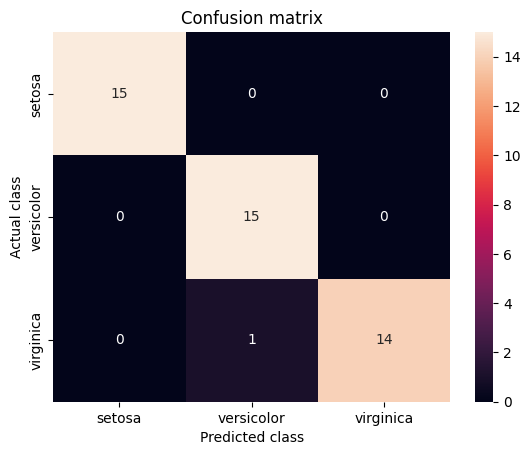

In [25]:
conf_matrix = confusion_matrix(y_test, predictions, labels = [0,1,2])
sns.heatmap (
    conf_matrix,
    annot = True,
    xticklabels = iris.target_names,
    yticklabels = iris.target_names)
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion matrix")
plt.show()


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
auc_score = roc_auc_score(
    y_test,
    prediction_probas,
    multi_class = "ovr",
    labels=[0,1,2]
)

In [29]:
print("Area under ROC Curve :{:.3f}".format(auc_score))


Area under ROC Curve :0.997
